## 매니폴드 가정 : 실제 고차원 데이터 셋이 더 낮은 저차원 매니폴드에 가깝게 놓여있다

## 차원의 저주(p>>n) -> 차원축소로 p를 줄여줌

# pca

1) 분산을 가장 보존하는 축을 찾아 투영함 (분산최대화-> 원본 데이터셋과 투영된 데이터셋 사이의 평균 제곱거리를 최소화 함 )

2) 첫번째 축에 직교하고 남은 분산을 최대화하는 축을 찾음 -> 1번째와 직교함

3) 1), 2) 를 반복 

가정 : 평균이 0, scaling이 되어 있음(필수 가정은 아니지만 결과가 scale에 영향을 받게 됨) 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X

array([[ 8.31039149e-01, -2.58748754e-01],
       [ 1.18506381e+00,  9.20387143e-01],
       [ 1.16402213e+00, -4.55525583e-01],
       [-2.36556013e-02,  1.08628844e+00],
       [ 4.80502733e-01,  1.50942444e+00],
       [ 1.31164912e+00, -5.51176060e-01],
       [ 1.16542367e+00, -1.58629894e-01],
       [ 1.56736404e-01,  1.31817168e+00],
       [ 4.53301022e-01,  4.96074925e-01],
       [ 1.65139719e+00, -4.59804351e-01],
       [ 1.02664982e+00, -1.56999382e-02],
       [-3.99677570e-01,  2.52192940e-01],
       [ 1.85352710e+00, -7.16418704e-01],
       [ 1.17564737e-01,  6.24869329e-01],
       [ 1.54123944e+00, -5.11050694e-01],
       [ 1.32833559e+00, -5.40696860e-01],
       [ 1.97170320e+00,  2.97790052e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [ 8.30619129e-01, -8.02099114e-01],
       [ 1.89343763e+00, -2.53611270e-01],
       [ 1.88323111e+00,  2.22375278e-01],
       [ 2.30801311e+00,  4.67930154e-01],
       [-3.89437608e-01,  2.39389050e-01],
       [ 1.

In [13]:
X_centered=X-X.mean(axis=0)

In [18]:
# svd를 이용해 pca하기

import numpy as np

# 평균이 0인 가정 때문에 X_centerede를 사용함 
U,s,Vt=np.linalg.svd(X_centered)

c1= Vt.T[:,0]
c2= Vt.T[:,1]

# evd(고유값 분해)

고유벡터 : 선형변환 A에 의한 변환결과가 자기 자신의 상수배가 되는 0이 아닌 벡터 -> 선형변환에 A에 의해 방향은 보존되나 scale만 변화되는 방향 벡터, 이 때 고유벡터의 변화되는 스케일 정도-> 고유값

고유값 : 위 상수배값

A-> nxn 의 정방행렬, n개의 일차독립(어느 한 벡터도 다른 벡터들의 일차결합으로 표현될 수 없음)인 고유벡터 

v-> 고유벡터

람다-> 고유값

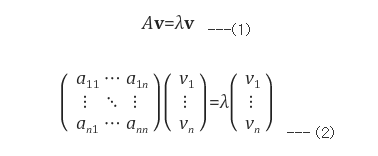 

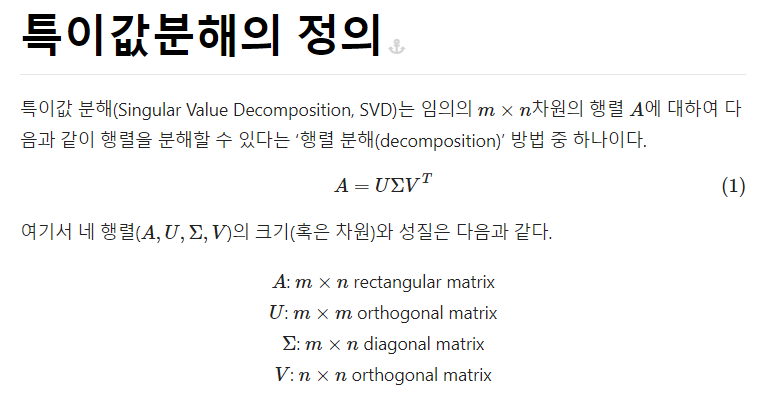

출처 : https://angeloyeo.github.io/2019/08/01/SVD.html

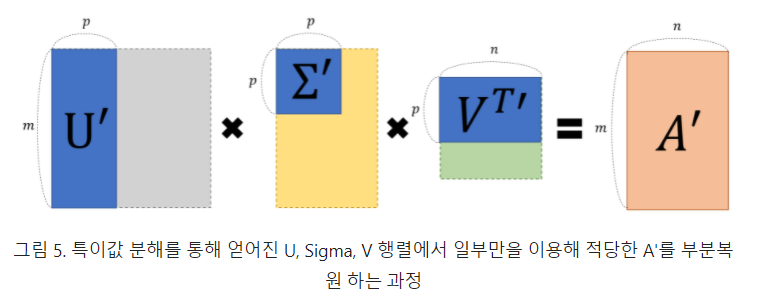

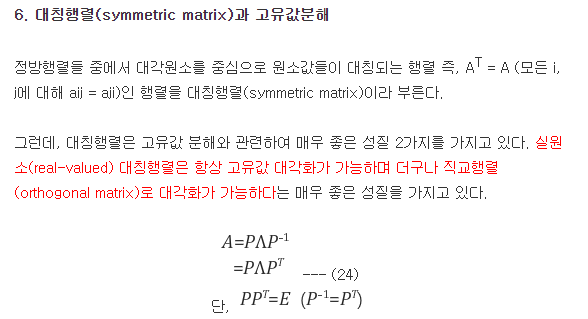

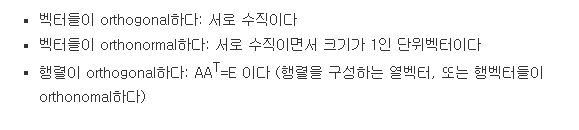

# SVD

symmetric matrix(항상 고유값 분해가 가능함)-> At=A

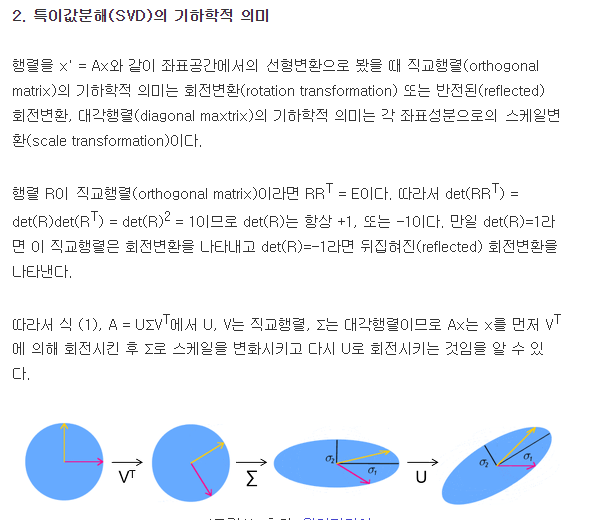

https://darkpgmr.tistory.com/106

In [20]:
# 사이킷런 적용

from sklearn.decomposition import PCA

pca=PCA(n_components=2)# 차원을 2로 줄임
X2D= pca.fit_transform(X)

In [21]:
pca.explained_variance_ratio_

array([0.76412601, 0.23587399])

In [24]:
pca=PCA()
pca.fit(X)
cumsum=sum(pca.explained_variance_ratio_) 
d=np.argmax(cumsum>=0.95)+1 # 분산 95%로 유지
pca=PCA(n_components=d)
pca.fit_transform(X)

array([[-4.55471837e-01],
       [-4.06478384e-01],
       [-8.34367680e-01],
       [ 7.90430985e-01],
       [ 4.51426713e-01],
       [-1.00508702e+00],
       [-7.39069362e-01],
       [ 6.95324919e-01],
       [ 1.47356896e-01],
       [-1.29660283e+00],
       [-5.61334280e-01],
       [ 8.74529379e-01],
       [-1.57124305e+00],
       [ 5.06731534e-01],
       [-1.20911993e+00],
       [-1.01745467e+00],
       [-1.35291540e+00],
       [-3.09939227e-01],
       [-6.31905957e-01],
       [-1.45836199e+00],
       [-1.29380313e+00],
       [-1.61554535e+00],
       [ 8.60679898e-01],
       [-7.07082743e-01],
       [ 1.84557221e-01],
       [-9.47209851e-01],
       [-9.65786031e-01],
       [ 1.28024154e+00],
       [ 7.03988532e-01],
       [ 5.08817986e-02],
       [-1.50373573e+00],
       [ 2.20312764e-01],
       [-1.75923823e+00],
       [ 1.20662017e+00],
       [-3.33660611e-01],
       [-1.66457329e-01],
       [-6.05732615e-01],
       [-2.11816872e-01],
       [ 1.5

In [31]:
len(X)

500

In [33]:
# 압축을 위한 pca

pca = PCA(n_components=1) # 주성분수로 압축 
X_reduced = pca.fit_transform(X)
X_recovered =pca.inverse_transform(X_reduced) # 원본 차원으로 되돌림 

In [35]:
# 랜덤 pca -> 계산복집도가 쥴어듬 

rnd_pca=PCA(n_components=1,svd_solver="randomized")

In [ ]:
# 점진적 pca 

# pca는 전체 데이터셋을 한번에 분해해야 하지만 